In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df=pd.read_csv('data/HRDataset_v14.csv',index_col='EmpID')
df.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         3

In [20]:
df['Department'].unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [95]:
salary_dept_mean=df.groupby('Department')['Salary'].mean()
salary_dept_mean=salary_dept_mean.sort_values();salary_dept_mean


Department
Production               59953.545455
Sales                    69061.258065
Admin Offices            71791.888889
Software Engineering     94989.454545
IT/IS                    97064.640000
Executive Office        250000.000000
Name: Salary, dtype: float64

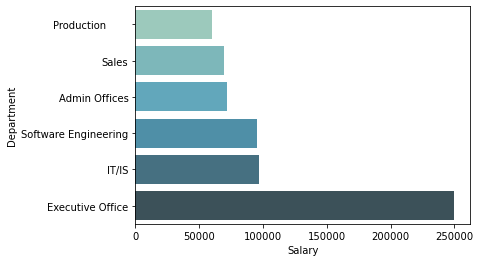

In [142]:
pd.DataFrame(salary_dept_mean)
ax = sns.barplot(y=salary_dept_mean.index,x=salary_dept_mean,palette='GnBu_d')


In [102]:
df[df['Department']=='Executive Office']['Position']

EmpID
10089    President & CEO
Name: Position, dtype: object

### While it appears that "Employees" of the executive office have the highest salaries, this is misleading as there is just one employee in the executive office and it is the President/CEO. 
### Among the other departments , employees of the Software Engineering and IT/IS departments have the highest average pay.

# Diversity Profile

RaceDesc
Hispanic                              1
American Indian or Alaska Native      3
Two or more races                    11
Asian                                29
Black or African American            80
White                               187
Name: Employee_Name, dtype: int64


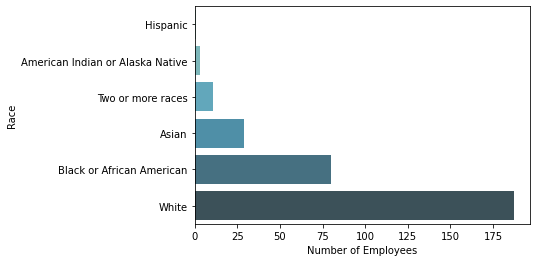

In [154]:
diversity_counts=df.groupby('RaceDesc')['Employee_Name'].count()
diversity_counts=diversity_counts.sort_values();
print(diversity_counts)

ax = sns.barplot(y=diversity_counts.index,x=diversity_counts,palette='GnBu_d')
ax.set(xlabel='Number of Employees', ylabel='Race')
plt.show()

### This paints a troubling picture as there is just a single employee identifying as Hispanic, but a closer look at the 'HispanicLatino' column reveals a more nuanced situation.

In [162]:
df[df['HispanicLatino']=='Yes']['HispanicLatino'].count()

27

### Even though there is only one person whose Race description is 'Hispanic', we see that 27 employees identify as Hispanic or Latino. 

### Now let us see the mean salary of employees by race

RaceDesc
Two or more races                   59998.181818
American Indian or Alaska Native    65806.000000
White                               67287.545455
Asian                               68521.206897
Black or African American           74431.025000
Hispanic                            83667.000000
Name: Salary, dtype: float64


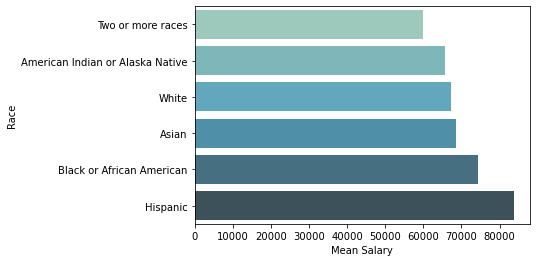

In [164]:
salary_race_mean=df.groupby('RaceDesc')['Salary'].mean()
salary_race_mean=salary_race_mean.sort_values();
print(salary_race_mean)

ax = sns.barplot(y=salary_race_mean.index,x=salary_race_mean,palette='GnBu_d')
ax.set(xlabel='Mean Salary', ylabel='Race')
plt.show()